Name:Deep Pooja Roll. No.: 17074

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
df=pd.read_csv(r"C:\Users\hp\Downloads\HAPT Data Set\train.csv")
d = pd.read_csv(r"C:\Users\hp\Downloads\HAPT Data Set\test.csv")
#print(d)
import datetime as dt
df['id'] = pd.to_datetime(df['id'])
df['id']=df['id'].map(dt.datetime.toordinal)
#d.head()
d['id'] = pd.to_datetime(d['id'])
d['id']=d['id'].map(dt.datetime.toordinal)

X_test = d.iloc[:,0:1]
print(X_test.shape)
df.head()

(10, 1)


,id,value
0,731886,0.5992
1,734777,0.9259
2,732677,5.9182
3,732343,9.2365
4,732828,22.7446


In [37]:
X_test

,id
0,733893
1,733498
2,735112
3,732312
4,732708
5,734716
6,735385
7,733102
8,731916
9,734319


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
y = df.iloc[:,1:2]#value
x = df.iloc[:,0:1]# id
#scaler = StandardScaler()
#x= scaler.fit_transform(x)
#y = scaler.fit_transform(y)
#X_test = scaler.fit_transform(X_test)


In [31]:
def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

In [39]:
import math
def sine(x,A=50):
    return A*(np.sin(x))
print(sine(2))

45.46487134128409


In [40]:
sineValue = sine(y)
#sine_test = sine(X_test)

In [32]:
gauss = gaussian_basis_function(x,50)
gauss_test = gaussian_basis_function(X_test,50)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,sineValue,test_size = .15)
print(x_train.shape)
print(x_test.shape)


(93, 1)
(17, 1)


In [45]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression() 
mdl.fit(x_train, y_train) 
cff = mdl.coef_
intrcpt = mdl.intercept_
print(cff,intrcpt)
print(mdl.score(x_train,y_train))
mdl.score(x_test,y_test)

[[-9.32107499e-05]] [66.92511886]
8.032220282450098e-06


-0.04652788528226792

In [49]:
from sklearn.metrics import mean_squared_error
ypred_train = mdl.predict(x_train)
ypred_test= mdl.predict(x_test)
mse_train =mean_squared_error(y_train, ypred_train)
mse_test =mean_squared_error(y_test, ypred_test)
print(mse_train)
print(mse_test)

1183.8951797398295
910.8220036452993


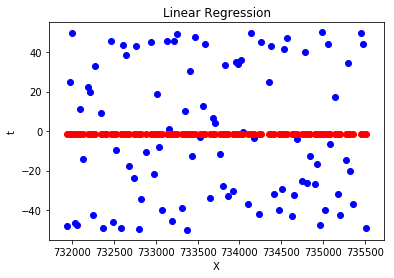

In [48]:
plt.scatter(x_train, y_train, color = 'blue') 
  
plt.scatter(x_train, mdl.predict(x_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('X') 
plt.ylabel('t') 
plt.show() 

In [50]:
y_test = mdl.predict(X_test)
y_test

array([[-1.48159803],
       [-1.44477978],
       [-1.59522193],
       [-1.33423183],
       [-1.37114329],
       [-1.55831048],
       [-1.62066847],
       [-1.40786833],
       [-1.29732038],
       [-1.52130581]])

In [56]:
dataframe = pd.DataFrame(a)
dataframe
dataframe.to_csv (r'C:\Users\hp\Downloads\HAPT Data Set\testfile1.csv', index = True, header=True) # saving the predicted values

#print (df)

1.0


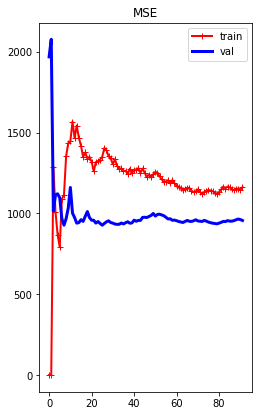

In [51]:
from sklearn.metrics import mean_squared_error
def curve_fitting_func(model, X, Y,X_test):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.15)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # error calculation with mean-squared-error
        train_errors.append(mean_squared_error(y_train[:m],
        y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.rcParams["figure.figsize"]=10,11
    fig = plt.subplots()
    
    plt.subplot(2, 3, 1)
    plt.tight_layout()
    plt.title('MSE')
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val") 
    plt.legend(loc='best')
    
    y_test = model.predict(X_test)
    print(model.score(X_test,y_test))
    return y_test,y_train_predict,X_train
a,b,c = curve_fitting_func(mdl,x,sineValue,X_test)


In [52]:
print(a)

[[-0.29748895]
 [ 0.17391981]
 [-1.7522922 ]
 [ 1.58933954]
 [ 1.11673734]
 [-1.27969   ]
 [-2.07810129]
 [ 0.64652201]
 [ 2.06194174]
 [-0.80589435]]


In [54]:
mse1 =mean_squared_error(y_test, a)
mse1

3.5087642690896352

In [40]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.15)

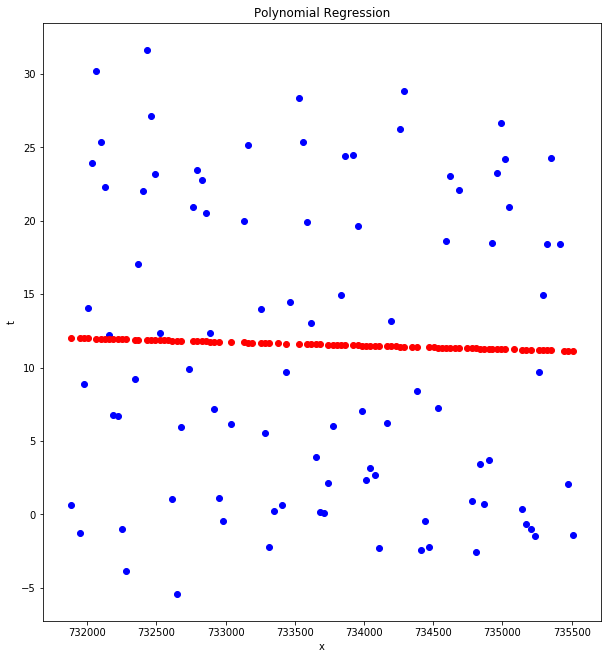

In [41]:
plt.scatter(X_train, y_train, color = 'blue') 
  
plt.scatter(c[0:92], b , color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('x') 
plt.ylabel('t') 
plt.show() 

In [42]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

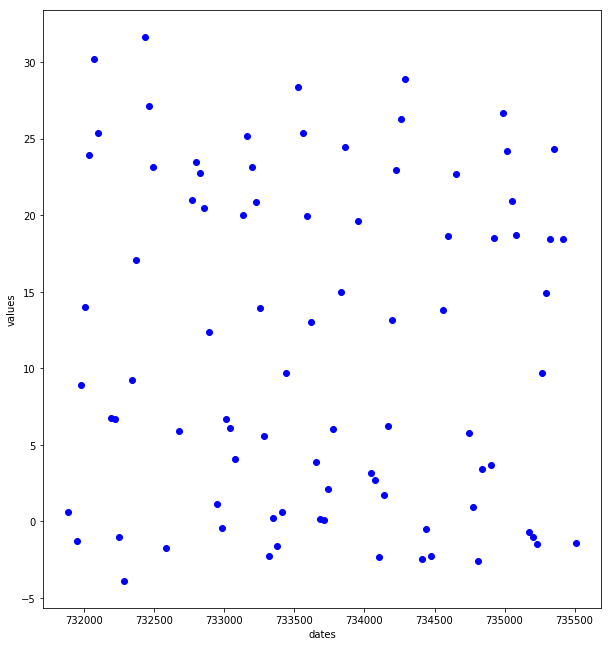

In [43]:
plt.scatter(train.id, train.value,  color='blue')
plt.xlabel("dates")
plt.ylabel("values")
plt.show()

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['id']])
train_y = np.asanyarray(train[['value']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00060674]]
Intercept:  [456.53351228]


Text(0,0.5,'values')

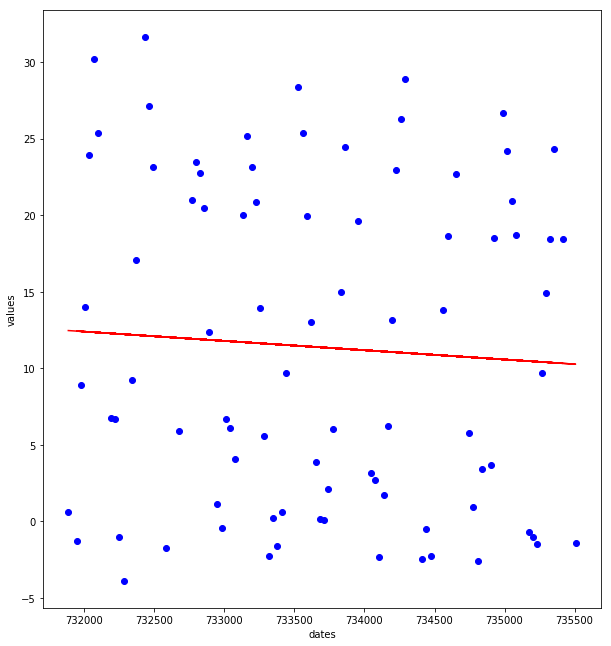

In [45]:
plt.scatter(train.id, train.value,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("dates")
plt.ylabel("values")

In [46]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['id']])
test_y = np.asanyarray(test[['value']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 7.30
Residual sum of squares (MSE): 72.72
R2-score: -172.83
